In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("final.csv")
df.head()

,latitude,longitude,blk_no,road_name,postal_code,address,cdb_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years
0,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,61
1,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,69,61
2,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,68,61
3,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,68,61
4,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,68,61


In [4]:
df.dtypes

latitude               float64
longitude              float64
blk_no                  object
road_name               object
postal_code              int64
address                 object
cdb_dist               float64
min_dist_mrt           float64
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
lease_remain_years       int64
dtype: object

#floor level variable is a categorical variable 
#Median is applied to map each HDB flat’s floor level.

In [6]:
import statistics

def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = statistics.median(float_list)
    return median

df['storey_median'] = df['storey_range'].apply(lambda x: get_median(x))
df.head()

,latitude,longitude,blk_no,road_name,postal_code,address,cdb_dist,min_dist_mrt,month,town,...,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years,storey_median
0,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2015-01,ANG MO KIO,...,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,61,8.0
1,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2015-12,ANG MO KIO,...,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,69,61,11.0
2,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-05,ANG MO KIO,...,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,68,61,5.0
3,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-06,ANG MO KIO,...,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,68,61,8.0
4,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-11,ANG MO KIO,...,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,68,61,5.0


In [37]:
#extract the relevant variables 
#cbd_dist = CBD distance
#min_dist_mrt = Distance to the nearest MRT station
#floor_area_sqm = Flat size
#lease_remain_years = Remaing years of lease
#storey_median = Floor level
#resale_price = Selling price (dependent variable)
df_new = df[['cdb_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']]
df_new

,cdb_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,10296.855747,1098.780832,60.0,61,8.0,255000.0
1,10296.855747,1098.780832,60.0,61,11.0,275000.0
2,10296.855747,1098.780832,69.0,61,5.0,310000.0
3,10296.855747,1098.780832,45.0,61,8.0,253000.0
4,10296.855747,1098.780832,61.0,61,5.0,290000.0
...,...,...,...,...,...,...
211060,12966.985396,1795.322839,68.0,95,5.0,540000.0
211061,12825.321381,1822.100553,68.0,95,5.0,540000.0
211062,12825.321381,1822.100553,68.0,95,5.0,540800.0
211063,12827.300646,1695.054501,92.0,95,11.0,728000.0


In [38]:
df_new = df_new.drop_duplicates()
df_new

,cdb_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,10296.855747,1098.780832,60.0,61,8.0,255000.0
1,10296.855747,1098.780832,60.0,61,11.0,275000.0
2,10296.855747,1098.780832,69.0,61,5.0,310000.0
3,10296.855747,1098.780832,45.0,61,8.0,253000.0
4,10296.855747,1098.780832,61.0,61,5.0,290000.0
...,...,...,...,...,...,...
211060,12966.985396,1795.322839,68.0,95,5.0,540000.0
211061,12825.321381,1822.100553,68.0,95,5.0,540000.0
211062,12825.321381,1822.100553,68.0,95,5.0,540800.0
211063,12827.300646,1695.054501,92.0,95,11.0,728000.0


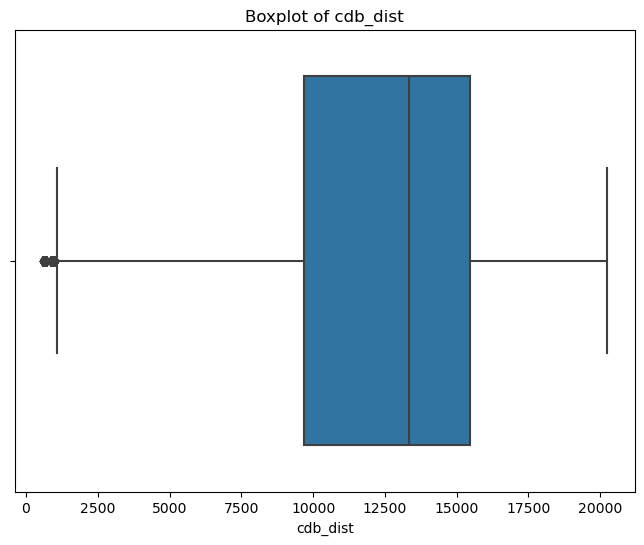

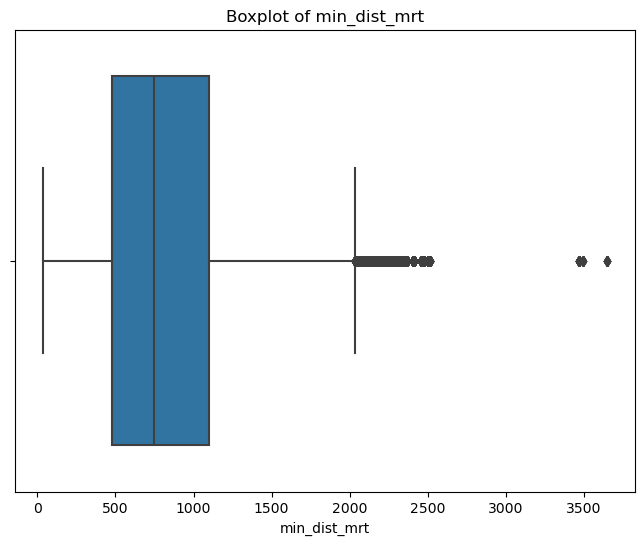

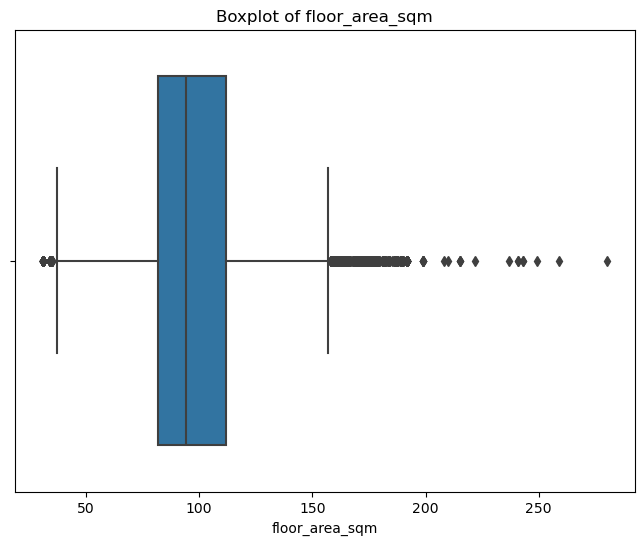

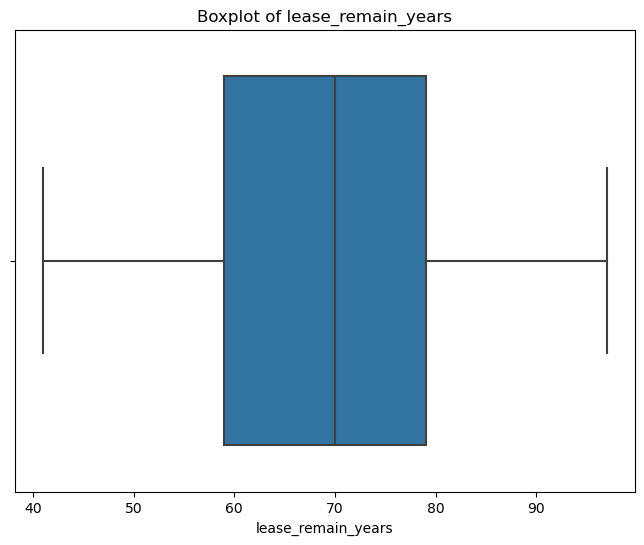

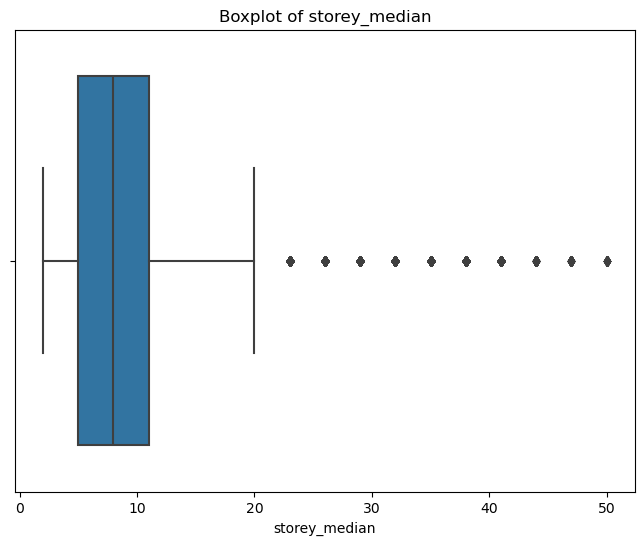

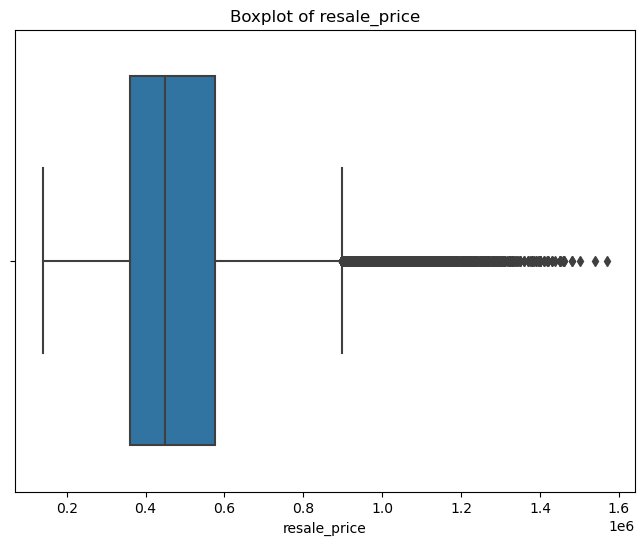

In [39]:
#Checking and Handling Skewness in the data
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns(continuous variables) for finding skewness
col = ['cdb_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

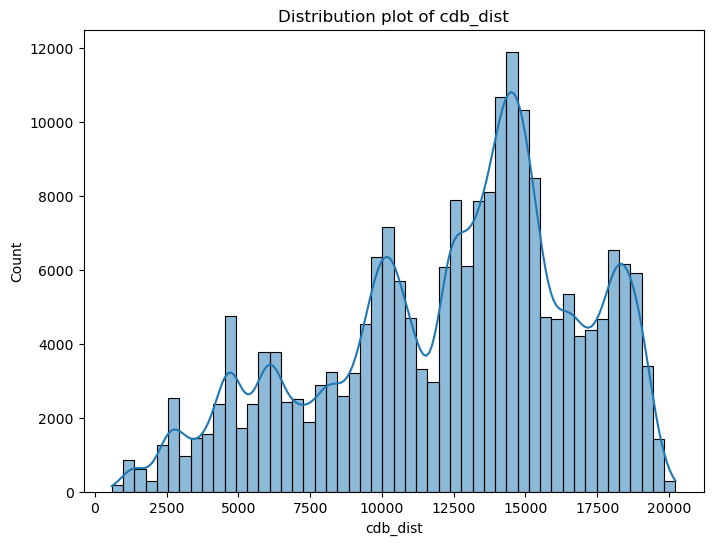

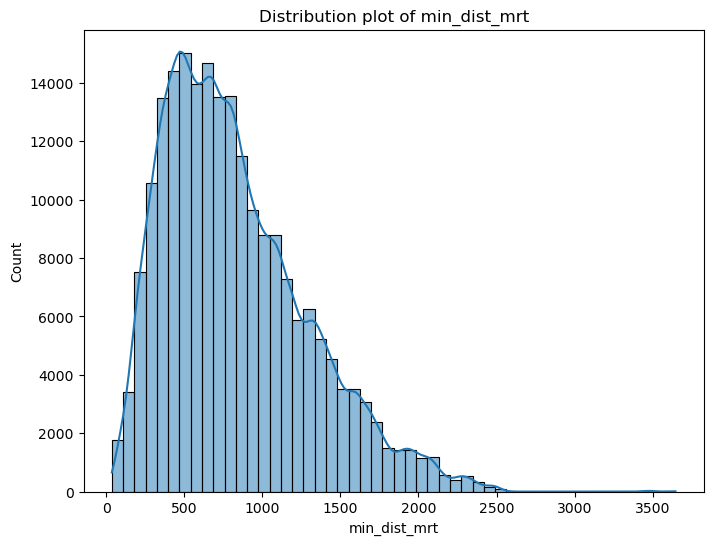

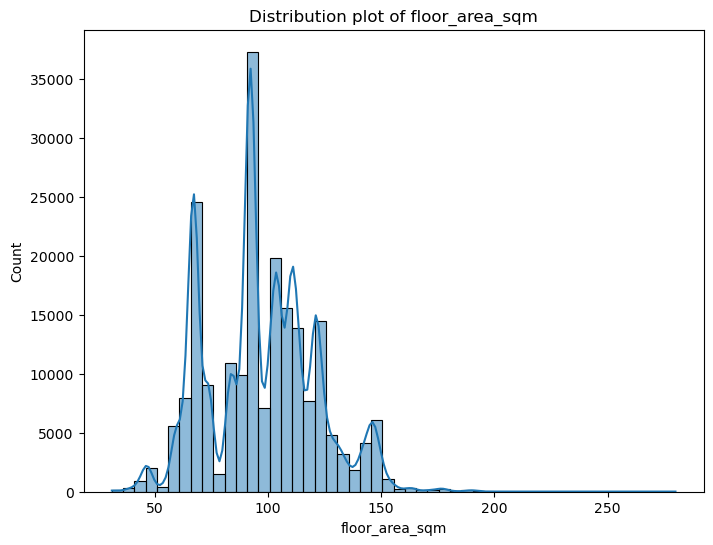

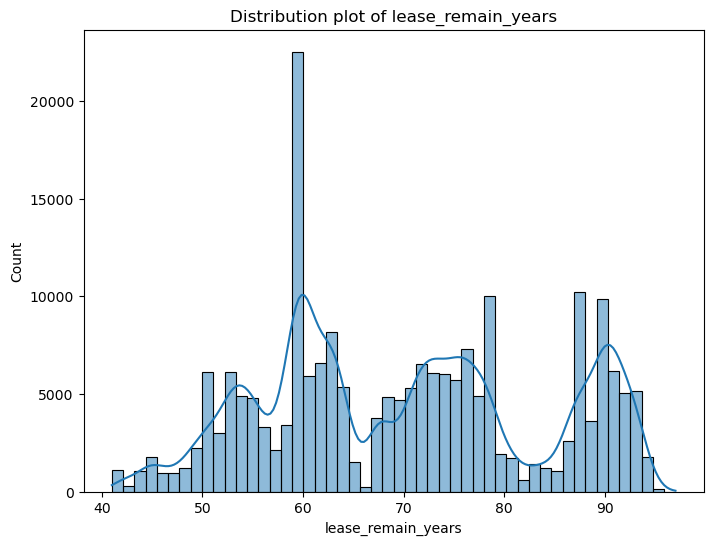

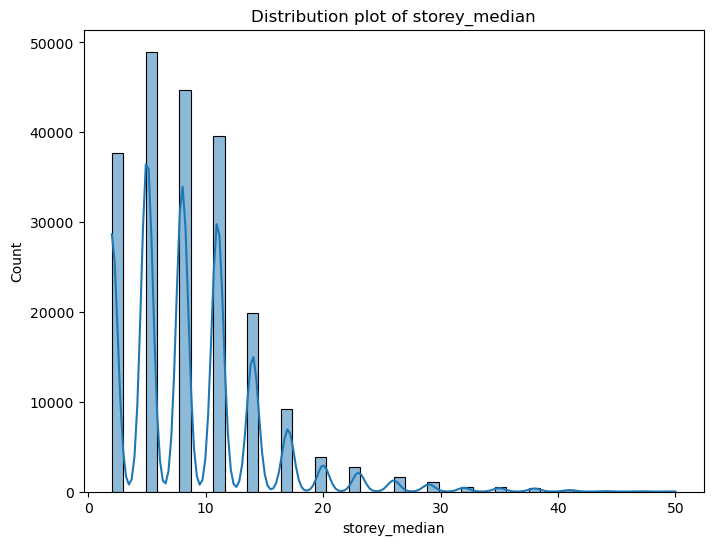

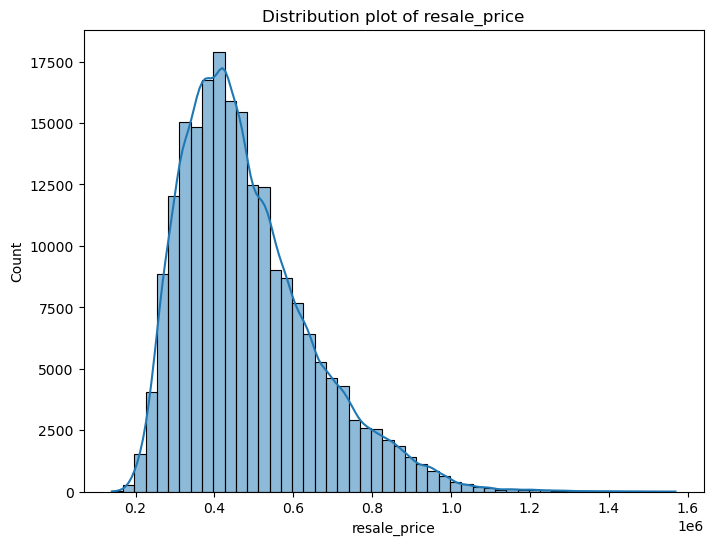

In [13]:
col = ['cdb_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.histplot(data=df, x=i, kde=True, bins=50)
    plt.title(f'Distribution plot of {i}')
    plt.xlabel(i)
    plt.show()   


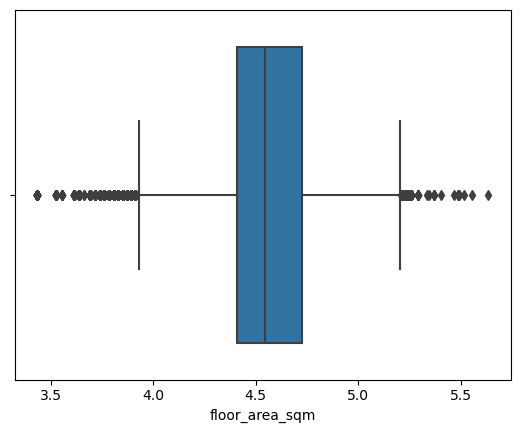

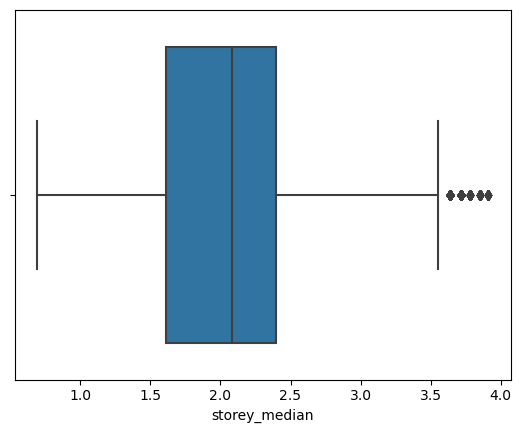

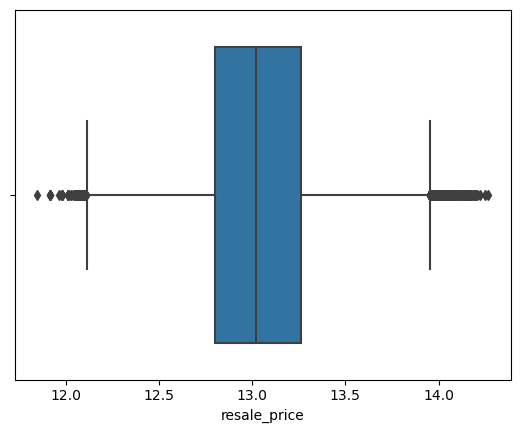

In [40]:
# Apply a logarithmic transformation to the required columns only.
#observe basd on skewness
df_new['floor_area_sqm']=np.log(df_new['floor_area_sqm'])
sns.boxplot(data=df_new,x='floor_area_sqm')
plt.show()

df_new['storey_median']=np.log(df_new['storey_median'])
sns.boxplot(data=df_new,x='storey_median')
plt.show()

df_new['resale_price'] = np.log(df_new['resale_price'])
sns.boxplot(x='resale_price', data=df_new)
plt.show()

In [41]:
#Correlation Matrix
import seaborn as sns

corrMatrix = df_new.corr()
corrMatrix 

,cdb_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
cdb_dist,1.000000,0.162088,0.258410,0.299240,-0.101720,-0.187787
min_dist_mrt,0.162088,1.000000,0.030342,0.261168,0.053266,-0.068571
floor_area_sqm,0.258410,0.030342,1.000000,0.187664,0.010240,0.659145
lease_remain_years,0.299240,0.261168,0.187664,1.000000,0.230727,0.413090
storey_median,-0.101720,0.053266,0.010240,0.230727,1.000000,0.272551
resale_price,-0.187787,-0.068571,0.659145,0.413090,0.272551,1.000000


#we can infer that the floor size has the highest strength relationship that impacts the resale price as this relationship is positively moderate. 

In [73]:
#Standardization is particularly useful when the features have different units or scales.
from sklearn.preprocessing import StandardScaler

X=df_new[['cdb_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median']]
y=df_new['resale_price']

# Normalizing the encoded data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [50]:
#Splitting the data for training and testing purposes
from sklearn.model_selection import train_test_split

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [54]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Decision Tree Regressor
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 4}


In [55]:
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)

 
Mean squared error: 0.01544039885598295
Mean Absolute Error 0.0987102293928784
Root Mean squared error: 0.12425940147925608
 
R-squared: 0.857855382326908


In [111]:
#cdb_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median'
new_sample = np.array([[10296.8, 1098.7, np.log(45), 61, np.log(8)]])
new_sample = scaler.transform(new_sample[:, :5])
new_pred = best_model.predict(new_sample)[0]
np.exp(new_pred)

232229.97385862088

In [57]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [67]:
# load the pickle model to predict selling price
import pickle
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)
with open('scaler.pkl', 'rb') as f:
    scale=pickle.load(f)
    
new_sample = np.array([[8740, 999, np.log(44), 55, np.log(11)]])
new_sample = scale.transform(new_sample[:, :5])
new_pred = model.predict(new_sample)[0]
np.exp(new_pred)

229366.5232627395

In [102]:
# load the pickle model to predict selling price
import pickle
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)
with open('scaler.pkl', 'rb') as f:
    scale=pickle.load(f)
    
new_sample = np.array([[10296,1098, np.log(60), 61, np.log(5)]])
new_sample = scale.transform(new_sample[:, :5])
new_pred = model.predict(new_sample)[0]
np.exp(new_pred)

290514.80807388766

In [71]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [77]:
def ml_regression(df, algorithm):
    
    X=df[['cdb_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median']]
    y=df['resale_price']

    # Normalizing the encoded data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # evalution metrics
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
   
    

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test,
                        'MSE_train': mse_train,
                        'MSE_test' : mse_test}

    return accuracy_metrics

In [78]:
print(ml_regression(df_new, DecisionTreeRegressor))
print(ml_regression(df_new, ExtraTreesRegressor))
print(ml_regression(df_new, RandomForestRegressor))
print(ml_regression(df_new, AdaBoostRegressor))
print(ml_regression(df_new, GradientBoostingRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9357362813050529, 'R2_test': 0.8047018020878908, 'MSE_train': 0.006994719707898697, 'MSE_test': 0.02121418398375624}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9357362813050529, 'R2_test': 0.8214791867521606, 'MSE_train': 0.006994719707898696, 'MSE_test': 0.019391747684603878}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9304892014044126, 'R2_test': 0.8436321118162603, 'MSE_train': 0.007565832832617613, 'MSE_test': 0.016985395587593374}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.7547301080631019, 'R2_test': 0.7559276333808267, 'MSE_train': 0.026696154248853004, 'MSE_test': 0.026512257389800033}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.826706647512458, 'R2_test': 0.8285814142839035, 'MSE_train': 0.018861940337538446, 'MSE_test': 0.01862027122878579}


In [83]:
#Decision Tree Regressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

param_grid_r = {'max_depth'      : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2', None]}

grid_search_r = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [86]:
grid_search_r.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [98]:
x=df_new[['cdb_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median']]
y=df_new['resale_price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model1 = RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=4, min_samples_split=10).fit(x_train, y_train)

y_pred_train = model1.predict(x_train)
y_pred_test = model1.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9004648105371378, 0.8713325785015316)

In [110]:
new_sample = np.array([[10296.8, 1098.7, np.log(45), 61, np.log(8)]])
#new_sample = scaler.transform(new_sample[:, :5])
new_pred = model1.predict(new_sample)[0]
np.exp(new_pred)

222214.233925837

In [121]:
data=pd.read_csv("mrt.csv")
mrt_location=pd.DataFrame(data)
mrt_location

,MRT,latitude,longitude
0,Jurong East MRT Station,1.333153,103.742286
1,Bukit Batok MRT Station,1.348932,103.749492
2,Bukit Gombak MRT Station,1.358663,103.751913
3,Choa Chu Kang MRT Station,1.385363,103.744371
4,Yew Tee MRT Station,1.397298,103.747358
...,...,...,...
117,Tampines West MRT Station,1.345515,103.938437
118,Tampines East MRT Station,1.356191,103.954634
119,Upper Changi MRT Station,1.341740,103.961473
120,Woodlands North MRT Station,1.447782,103.785136


In [122]:
# Saving the model
import pickle
with open('model1.pkl', 'wb') as file:
    pickle.dump(model1, file)
